In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset

In [101]:
# Load the dataset
df = pd.read_csv('assessment2_dataset.csv')

# Display the first few rows of the dataframe
print(df.head())

   Loan_ID Gender Marital_Status Number_of_Dependents Education_Level  \
0  LP00031   Male            Yes                    0        Graduate   
1  LP00032   Male            Yes                    2        Graduate   
2  LP00033   Male            Yes                    0        Graduate   
3  LP00034   Male             No                    0    Not Graduate   
4  LP00035   Male            Yes                    0        Graduate   

  Independent_Worker  Applicant_Income  Coapplicant_Income   Location  \
0                 No              9329                   0      Rural   
1                 No              2043                1619      Rural   
2                 No              4754                2331      Urban   
3                 No              2721                   0      Urban   
4                 No              2998                3419  Semiurban   

   Amount_Requested   Term  Credit_History Approval_Status  
0             189.0  180.0             1.0               Y  


In [102]:
df.describe()

,Applicant_Income,Coapplicant_Income,Amount_Requested,Term,Credit_History
count,610.000000,610.000000,592.000000,596.000000,560.000000
mean,5415.578689,1622.114754,146.459459,341.879195,0.841071
std,6126.143268,2935.113192,85.597858,65.322153,0.365936
min,147.000000,0.000000,9.000000,12.000000,0.000000
25%,2882.750000,0.000000,101.000000,360.000000,1.000000
50%,3813.000000,1150.000000,127.500000,360.000000,1.000000
75%,5793.750000,2299.500000,167.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Step 2: Exploratory Data Analysis (EDA)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               610 non-null    object 
 1   Gender                597 non-null    object 
 2   Marital_Status        607 non-null    object 
 3   Number_of_Dependents  595 non-null    object 
 4   Education_Level       610 non-null    object 
 5   Independent_Worker    578 non-null    object 
 6   Applicant_Income      610 non-null    int64  
 7   Coapplicant_Income    610 non-null    int64  
 8   Location              610 non-null    object 
 9   Amount_Requested      592 non-null    float64
 10  Term                  596 non-null    float64
 11  Credit_History        560 non-null    float64
 12  Approval_Status       610 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.1+ KB


In [104]:
df.value_counts()

Loan_ID  Gender  Marital_Status  Number_of_Dependents  Education_Level  Independent_Worker  Applicant_Income  Coapplicant_Income  Location   Amount_Requested  Term   Credit_History  Approval_Status
LP00031  Male    Yes             0                     Graduate         No                  9329              0                   Rural      189.0             180.0  1.0             Y                  1
LP00032  Male    Yes             2                     Graduate         No                  2043              1619                Rural      102.0             360.0  1.0             Y                  1
LP00447  Male    Yes             3+                    Graduate         No                  5247              0                   Urban      94.0              360.0  1.0             N                  1
LP00446  Male    No              0                     Graduate         No                  3167              0                   Urban      75.0              360.0  1.0             N          

In [105]:
df.columns

Index(['Loan_ID', 'Gender', 'Marital_Status', 'Number_of_Dependents',
       'Education_Level', 'Independent_Worker', 'Applicant_Income',
       'Coapplicant_Income', 'Location', 'Amount_Requested', 'Term',
       'Credit_History', 'Approval_Status'],
      dtype='object')

# Step 3: Data Cleaning and handling missing values

In [106]:
df.isna().sum()

Loan_ID                  0
Gender                  13
Marital_Status           3
Number_of_Dependents    15
Education_Level          0
Independent_Worker      32
Applicant_Income         0
Coapplicant_Income       0
Location                 0
Amount_Requested        18
Term                    14
Credit_History          50
Approval_Status          0
dtype: int64

In [107]:
# Fill missing values for categorical columns using the mode

categorical_columns = ['Gender', 'Marital_Status', 'Education_Level', 'Independent_Worker', 'Location', 'Credit_History']
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# For 'Number_of_Dependents', which might be numerical but likely represents categories (like 0, 1, 2, etc.), we'll use mode
df['Number_of_Dependents'] = df['Number_of_Dependents'].fillna(df['Number_of_Dependents'].mode()[0])

# Fill missing values for numerical columns using the median
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term']
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())

# After handling missing values, ensure no more missing values exist
missing_values_check = df.isnull().sum()
print(missing_values_check)

Loan_ID                 0
Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education_Level         0
Independent_Worker      0
Applicant_Income        0
Coapplicant_Income      0
Location                0
Amount_Requested        0
Term                    0
Credit_History          0
Approval_Status         0
dtype: int64


#  Correlation Analysis:

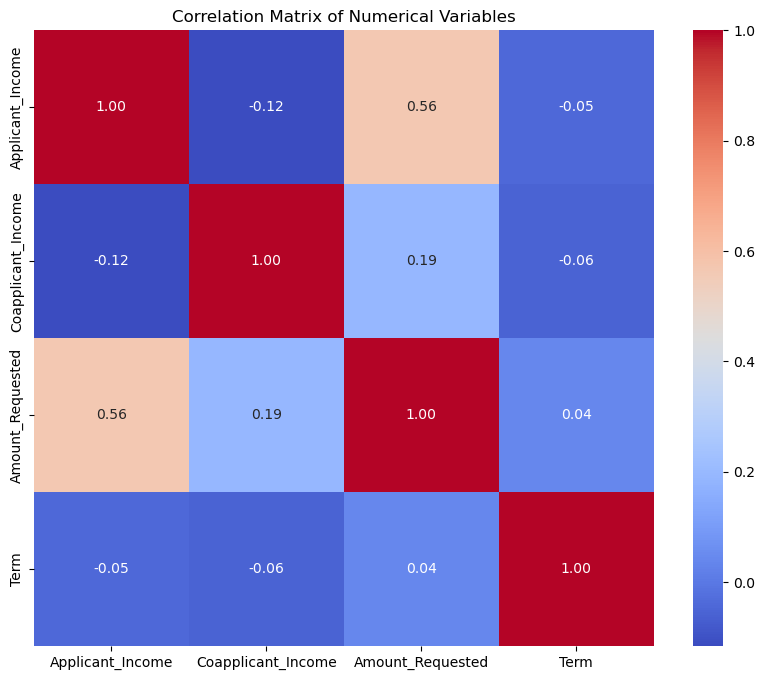

In [108]:
# Correlation matrix heatmap
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#### coverting string values into numerical values

### Part A: Supervised Learning and Analytics

#### Incorporation of Naive Bayes and SVM:

#### Data Preparation

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# features 
X = df.drop(['Loan_ID', 'Approval_Status', 'Applicant_Income', 'Amount_Requested'], axis=1)  # Dropping non-transformed variables


# target variable
y = df['Approval_Status'].map({'Y': 1, 'N': 0})  # Encoding target variable


# One-hot encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets to ensure they are split correctly
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((488, 12), (122, 12), (488,), (122,))

#### Standardize features

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Now  we'll train the models and evaluate their performance.

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-NN': KNeighborsClassifier()
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                      Accuracy  Precision    Recall  F1-Score
Gaussian Naive Bayes  0.811475   0.787037  1.000000  0.880829
SVM                   0.803279   0.779817  1.000000  0.876289
Logistic Regression   0.803279   0.779817  1.000000  0.876289
Decision Tree         0.696721   0.772727  0.800000  0.786127
Random Forest         0.795082   0.794118  0.952941  0.866310
K-NN                  0.795082   0.772727  1.000000  0.871795


#### Hyperparameter Tuning for SVM

In [112]:
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Grid Search Initialization
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# best parameters
print("Best Parameters:", grid.best_params_)

# Evaluate the best model
best_svm = grid.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best_svm)
precision = precision_score(y_test, y_pred_best_svm)
recall = recall_score(y_test, y_pred_best_svm)
f1 = f1_score(y_test, y_pred_best_svm)

print("Best SVM Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................

### 2. Feature Engineering

#### Interaction Features and Polynomial Features

In [113]:
from sklearn.preprocessing import PolynomialFeatures

# polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# train a model on polynomial features to see if performance improves
lr_poly = LogisticRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

print("Polynomial Features Performance:")
print(f"Accuracy: {accuracy_poly}")
print(f"Precision: {precision_poly}")
print(f"Recall: {recall_poly}")
print(f"F1-Score: {f1_poly}")


Polynomial Features Performance:
Accuracy: 0.7786885245901639
Precision: 0.7843137254901961
Recall: 0.9411764705882353
F1-Score: 0.8556149732620321


### PCA for Dimensionality Reduction

In [114]:
from sklearn.decomposition import PCA

# PCA application
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluation of model
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

print("PCA Features Performance:")
print(f"Accuracy: {accuracy_pca}")
print(f"Precision: {precision_pca}")
print(f"Recall: {recall_pca}")
print(f"F1-Score: {f1_pca}")

PCA Features Performance:
Accuracy: 0.7950819672131147
Precision: 0.7777777777777778
Recall: 0.9882352941176471
F1-Score: 0.8704663212435234


### 3. Fair Analysis

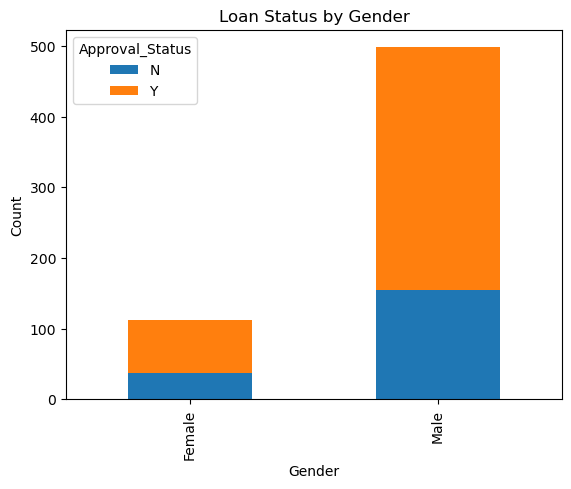

Disparate Impact Ratio (DIR) for Gender: 0.9722511453561016


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution in loan approvals
gender_loan_distribution = df.groupby(['Gender', 'Approval_Status']).size().unstack()
gender_loan_distribution.plot(kind='bar', stacked=True)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Fairness metrics: Disparate Impact Ratio (DIR)
approved_male = len(df[(df['Gender'] == 'Male') & (df['Approval_Status'] == 'Y')])
approved_female = len(df[(df['Gender'] == 'Female') & (df['Approval_Status'] == 'Y')])
applicants_male = len(df[df['Gender'] == 'Male'])
applicants_female = len(df[df['Gender'] == 'Female'])

dir_gender = (approved_female / applicants_female) / (approved_male / applicants_male)
print(f"Disparate Impact Ratio (DIR) for Gender: {dir_gender}")

### 4. Unsupervised Learning Insights

### K-Means Clustering

C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fr2071tu\sample_project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


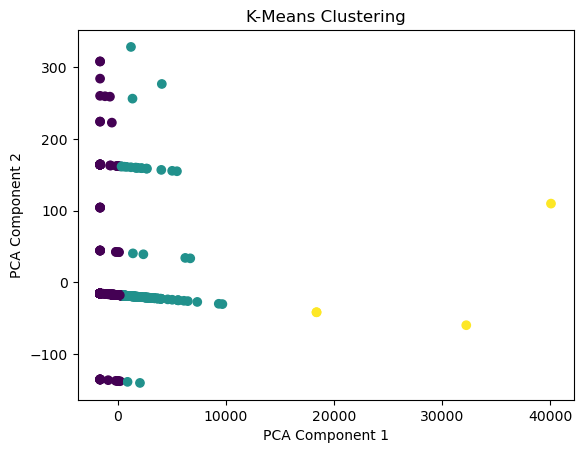

         Applicant_Income  Coapplicant_Income  Amount_Requested        Term  \
Cluster                                                                       
0             5979.012195          478.560976        136.590244  343.375610   
1             4315.091837         3458.005102        164.341837  340.591837   
2             1587.500000        28877.750000        196.500000  315.000000   

         Credit_History  
Cluster                  
0              0.848780  
1              0.862245  
2              1.000000  


C:\Users\fr2071tu\AppData\Local\Temp\ipykernel_9924\3171867734.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()


In [116]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

# Visualization of clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# cluster characteristics
df['Cluster'] = clusters
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

### Hierarchical Clustering

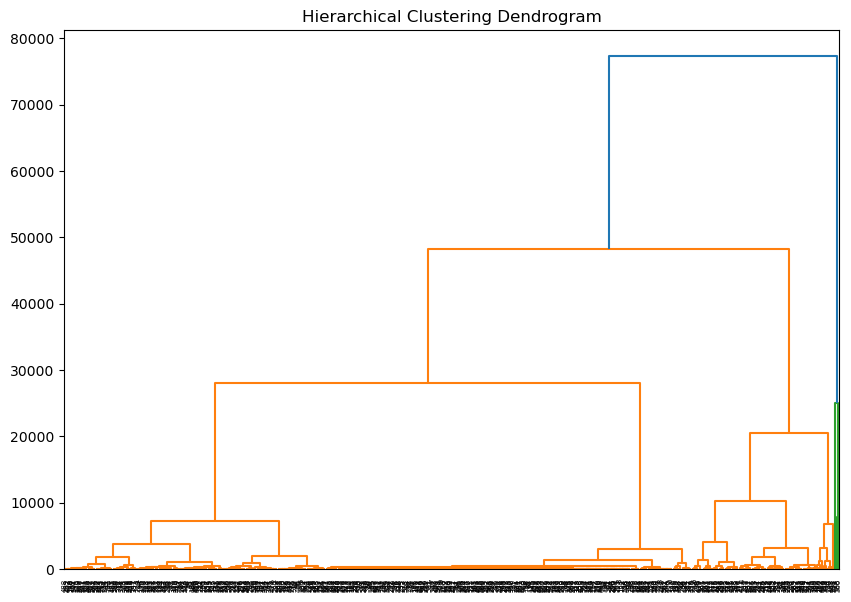

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage

# hierarchical clustering
linked = linkage(X_encoded, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Cluster Analysis for Loan Approval Rates

In [118]:
# Loan approval rates per cluster
cluster_loan_approval = df.groupby('Cluster')['Approval_Status'].value_counts(normalize=True).unstack()
print(cluster_loan_approval)

Approval_Status         N         Y
Cluster                            
0                0.321951  0.678049
1                0.290816  0.709184
2                0.750000  0.250000


### Challenges with K-Means Method
#### 1. Selecting the Number of Clusters:
* It's often unclear how many clusters to choose.
* Solutions: Use the elbow method, silhouette score, or cross-validation techniques.

#### 2. Cluster Shape Assumptions:

* K-Means assumes spherical clusters which may not always be the case.
* Solutions: Use more flexible clustering methods like DBSCAN or Gaussian Mixture Models.

### Innovative Analytics
#### Estimate Predictive Uncertainty

In [119]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train Random Forest for uncertainty estimation
rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)

# predictions and their probabilities
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  

# uncertainty as the standard deviation of predicted probabilities from each tree
tree_preds = np.array([tree.predict_proba(X_test)[:, 1] for tree in rf.estimators_])
uncertainty = np.std(tree_preds, axis=0)

# predicted probabilities and their uncertainties
for i in range(10):
    print(f"Sample {i+1} - Predicted Probability: {y_pred_proba_rf[i]:.4f}, Uncertainty: {uncertainty[i]:.4f}")


Sample 1 - Predicted Probability: 0.9700, Uncertainty: 0.1706
Sample 2 - Predicted Probability: 0.9300, Uncertainty: 0.2551
Sample 3 - Predicted Probability: 0.9800, Uncertainty: 0.1400
Sample 4 - Predicted Probability: 0.9522, Uncertainty: 0.1559
Sample 5 - Predicted Probability: 0.6771, Uncertainty: 0.2559
Sample 6 - Predicted Probability: 0.6976, Uncertainty: 0.4338
Sample 7 - Predicted Probability: 0.9601, Uncertainty: 0.1586
Sample 8 - Predicted Probability: 0.7900, Uncertainty: 0.4073
Sample 9 - Predicted Probability: 0.8133, Uncertainty: 0.1988
Sample 10 - Predicted Probability: 0.8133, Uncertainty: 0.1988


### Use SHAP or LIME for Model Explanations

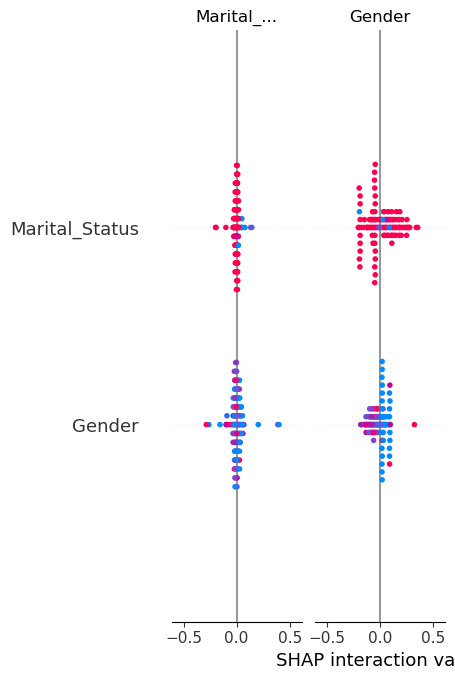

In [120]:
import shap

# SHAP explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# To get the mean absolute SHAP values across all classes
shap_values_sum = np.abs(shap_values[0]).mean(axis=0)
for shap_values_class in shap_values[1:]:
    shap_values_sum += np.abs(shap_values_class).mean(axis=0)
shap_values_mean = shap_values_sum / len(shap_values)

# Plot summary of feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

#### The SHAP summary plot shows the impact of each feature on the model's output. Positive SHAP values increase the likelihood of the positive class (e.g., loan approval), and negative values decrease it.

### Real-Time Prediction System Architecture
#### Here is a high-level architecture for a real-time prediction system:

#### 1. Data Ingestion Layer:

* Sources: Web forms, APIs, IoT devices, databases.
* Tools: Kafka, AWS Kinesis, Google Pub/Sub for streaming data.

#### 2. Preprocessing Layer:

* Tasks: Data cleaning, feature engineering, scaling.
* Tools: Apache Spark, Pandas, Scikit-learn Pipelines.

#### 3. Model Inference Layer:

* Tasks: Load the trained model, make predictions.
* Tools: TensorFlow Serving, Flask/Django for REST API, AWS SageMaker.

#### 4. Post-processing Layer:

* Tasks: Apply business logic, calculate uncertainties, generate explanations.
* Tools: Custom scripts, SHAP/LIME for explanations.

#### 5. Serving Layer:

* Tasks: Serve predictions to clients/applications.
* Tools: REST APIs, WebSockets, gRPC.

#### 6. Monitoring Layer:

* Tasks: Monitor model performance, log predictions, and outcomes.
* Tools: Prometheus, Grafana, ELK stack (Elasticsearch, Logstash, Kibana)

# Part B: Deep Learning

### Strategy for Model Performance Monitoring and Updating Criteria

#### Monitoring:

* Performance Metrics: Track accuracy, precision, recall, F1-score on a validation set.
* Data Drift: Monitor statistical properties of input data to detect shifts from the training data distribution.
* Logging: Log predictions, actual outcomes, and uncertainties for analysis.
* Visualization: Use dashboards (Grafana, Kibana) to visualize performance over time.

#### 2. Updating Criteria:

* Scheduled Retraining: Retrain the model periodically (e.g., monthly or quarterly).
* Performance Degradation: Retrain if performance metrics drop below a threshold.
* Data Drift: Trigger retraining when significant drift is detected using statistical tests (e.g., KS test, Chi-square test).
* Incorporate Feedback: Continuously update the training set with new data and feedback to improve model robustness.

## 1. Training a Basic Neural Network

In [121]:
import pandas as pd

data = pd.read_csv('assessment2_dataset.csv')
print(data.head())


   Loan_ID Gender Marital_Status Number_of_Dependents Education_Level  \
0  LP00031   Male            Yes                    0        Graduate   
1  LP00032   Male            Yes                    2        Graduate   
2  LP00033   Male            Yes                    0        Graduate   
3  LP00034   Male             No                    0    Not Graduate   
4  LP00035   Male            Yes                    0        Graduate   

  Independent_Worker  Applicant_Income  Coapplicant_Income   Location  \
0                 No              9329                   0      Rural   
1                 No              2043                1619      Rural   
2                 No              4754                2331      Urban   
3                 No              2721                   0      Urban   
4                 No              2998                3419  Semiurban   

   Amount_Requested   Term  Credit_History Approval_Status  
0             189.0  180.0             1.0               Y  


In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# features 
X = df.drop(['Loan_ID', 'Approval_Status', 'Applicant_Income', 'Amount_Requested'], axis=1) 

# target variable
y = df['Approval_Status'].map({'Y': 1, 'N': 0})  

# One-hot encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets to ensure they are split correctly
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((488, 13), (122, 13), (488,), (122,))

In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


C:\Users\fr2071tu\sample_project\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5094 - loss: 12.2432 - val_accuracy: 0.4490 - val_loss: 2.8802
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5813 - loss: 4.1956 - val_accuracy: 0.5510 - val_loss: 2.3360
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6293 - loss: 2.7130 - val_accuracy: 0.6837 - val_loss: 2.0836
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6446 - loss: 2.4689 - val_accuracy: 0.5918 - val_loss: 1.7188
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6224 - loss: 2.0142 - val_accuracy: 0.4898 - val_loss: 2.1350
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6329 - loss: 2.0829 - val_accuracy: 0.5612 - val_loss: 2.4337
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6265 - loss: 2.5964 - val_accuracy: 0.4592 - val_loss: 4.9743
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6422 - loss: 3.5319 - val_accuracy: 0.4796 - val_loss: 3.0462
E

## 2. Implementing Feature Learning for Complex Pattern Extraction
### Deep neural networks automatically learn features from the data through hidden layers. Here, we have used multiple dense layers to enable the network to learn complex patterns from the data.

In [124]:
from tensorflow.keras.layers import Input, Embedding, Concatenate, Flatten, Dense
from tensorflow.keras.models import Model

# inputs
input_gender = Input(shape=(1,))
input_marital_status = Input(shape=(1,))
input_education = Input(shape=(1,))
input_independent_worker = Input(shape=(1,))
input_location = Input(shape=(1,))

# embeddings
embedding_gender = Embedding(input_dim=2, output_dim=2)(input_gender)
embedding_marital_status = Embedding(input_dim=2, output_dim=2)(input_marital_status)
embedding_education = Embedding(input_dim=2, output_dim=2)(input_education)
embedding_independent_worker = Embedding(input_dim=2, output_dim=2)(input_independent_worker)
embedding_location = Embedding(input_dim=3, output_dim=3)(input_location)

# embeddings
flat_gender = Flatten()(embedding_gender)
flat_marital_status = Flatten()(embedding_marital_status)
flat_education = Flatten()(embedding_education)
flat_independent_worker = Flatten()(embedding_independent_worker)
flat_location = Flatten()(embedding_location)

# Combine all inputs
combined = Concatenate()([flat_gender, flat_marital_status, flat_education, flat_independent_worker, flat_location])

# Define the rest of the network
dense_1 = Dense(64, activation='relu')(combined)
dense_2 = Dense(32, activation='relu')(dense_1)
output = Dense(1, activation='sigmoid')(dense_2)

# the model
model = Model(inputs=[input_gender, input_marital_status, input_education, input_independent_worker, input_location], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the data for the embedding model
X_train_embeddings = [
    X_train['Gender_Male'],
    X_train['Marital_Status_Yes'],
    X_train['Education_Level_Not Graduate'],
    X_train['Independent_Worker_Yes'],
    X_train['Location_Semiurban'],
]

# model training
history = model.fit(X_train_embeddings, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5716 - loss: 0.6902 - val_accuracy: 0.6735 - val_loss: 0.6781
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6738 - loss: 0.6734 - val_accuracy: 0.6735 - val_loss: 0.6574
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6712 - loss: 0.6523 - val_accuracy: 0.6735 - val_loss: 0.6358
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6988 - loss: 0.6221 - val_accuracy: 0.6735 - val_loss: 0.6248
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7052 - loss: 0.6068 - val_accuracy: 0.6735 - val_loss: 0.6231
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.5895 - val_accuracy: 0.6735 - val_loss: 0.6228
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6896 - loss: 0.6146 - val_accuracy: 0.6735 - val_loss: 0.6185
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6793 - loss: 0.6201 - val_accuracy: 0.6735 - val_loss

## 3. Utilizing Embedding Layers for Categorical Data
### For categorical data, embedding layers are often used to convert high-dimensional categorical data into lower-dimensional vectors. Here's an example:

In [128]:
# Prepare the data for the embedding model
X_train_embeddings = [
    X_train['Gender_Male'].values,  
    X_train['Marital_Status_Yes'].values,  
    X_train['Education_Level_Not Graduate'].values,  
    X_train['Independent_Worker_Yes'].values,  
    X_train['Location_Semiurban'].values, 
]

# Define the model architecture
input_gender = Input(shape=(1,))
input_marital_status = Input(shape=(1,))
input_education = Input(shape=(1,))
input_independent_worker = Input(shape=(1,))
input_location = Input(shape=(1,))

# Define embeddings
embedding_dim = 5  # You can adjust the dimensionality of the embedding space
embedding_gender = Embedding(input_dim=2, output_dim=embedding_dim)(input_gender)
embedding_marital_status = Embedding(input_dim=2, output_dim=embedding_dim)(input_marital_status)
embedding_education = Embedding(input_dim=2, output_dim=embedding_dim)(input_education)
embedding_independent_worker = Embedding(input_dim=2, output_dim=embedding_dim)(input_independent_worker)
embedding_location = Embedding(input_dim=2, output_dim=embedding_dim)(input_location)

# Flatten embeddings
flat_gender = Flatten()(embedding_gender)
flat_marital_status = Flatten()(embedding_marital_status)
flat_education = Flatten()(embedding_education)
flat_independent_worker = Flatten()(embedding_independent_worker)
flat_location = Flatten()(embedding_location)

# Combine all inputs
combined = Concatenate()([flat_gender, flat_marital_status, flat_education, flat_independent_worker, flat_location])

# Define the rest of the network
dense_1 = Dense(64, activation='relu')(combined)
dense_2 = Dense(32, activation='relu')(dense_1)
output = Dense(1, activation='sigmoid')(dense_2)

# Define the model
model = Model(inputs=[input_gender, input_marital_status, input_education, input_independent_worker, input_location], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_embeddings, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5877 - loss: 0.6882 - val_accuracy: 0.6735 - val_loss: 0.6711
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7058 - loss: 0.6562 - val_accuracy: 0.6735 - val_loss: 0.6458
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6332 - loss: 0.6506 - val_accuracy: 0.6735 - val_loss: 0.6325
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6732 - loss: 0.6254 - val_accuracy: 0.6735 - val_loss: 0.6317
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6881 - loss: 0.6148 - val_accuracy: 0.6735 - val_loss: 0.6315
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6910 - loss: 0.6109 - val_accuracy: 0.6735 - val_loss: 0.6262
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6880 - loss: 0.6201 - val_accuracy: 0.6735 - val_loss: 0.6238
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6877 - loss: 0.6151 - val_accuracy: 0.6735 - val_los

In [146]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Concatenate, Flatten, Dense
from tensorflow.keras.models import Model
import shap

# Define the model architecture
input_gender = Input(shape=(1,))
input_marital_status = Input(shape=(1,))
input_education = Input(shape=(1,))
input_independent_worker = Input(shape=(1,))
input_location = Input(shape=(1,))

embedding_dim = 5  # You can adjust the dimensionality of the embedding space
embedding_gender = Embedding(input_dim=2, output_dim=embedding_dim)(input_gender)
embedding_marital_status = Embedding(input_dim=2, output_dim=embedding_dim)(input_marital_status)
embedding_education = Embedding(input_dim=2, output_dim=embedding_dim)(input_education)
embedding_independent_worker = Embedding(input_dim=2, output_dim=embedding_dim)(input_independent_worker)
embedding_location = Embedding(input_dim=2, output_dim=embedding_dim)(input_location)

flat_gender = Flatten()(embedding_gender)
flat_marital_status = Flatten()(embedding_marital_status)
flat_education = Flatten()(embedding_education)
flat_independent_worker = Flatten()(embedding_independent_worker)
flat_location = Flatten()(embedding_location)

combined = Concatenate()([flat_gender, flat_marital_status, flat_education, flat_independent_worker, flat_location])

dense_1 = Dense(64, activation='relu')(combined)
dense_2 = Dense(32, activation='relu')(dense_1)
output = Dense(1, activation='sigmoid')(dense_2)

model = Model(inputs=[input_gender, input_marital_status, input_education, input_independent_worker, input_location], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the data for the embedding model for training data
X_train_embeddings = [
    X_train['Gender_Male'].values,  
    X_train['Marital_Status_Yes'].values,  
    X_train['Education_Level_Not Graduate'].values,  
    X_train['Independent_Worker_Yes'].values,  
    X_train['Location_Semiurban'].values, 
]

# Train the model
history = model.fit(X_train_embeddings, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Prepare the data for the embedding model for test data
X_test_embeddings = [
    X_test['Gender_Male'].values,  
    X_test['Marital_Status_Yes'].values,  
    X_test['Education_Level_Not Graduate'].values,  
    X_test['Independent_Worker_Yes'].values,  
    X_test['Location_Semiurban'].values, 
]

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(model, X_train_embeddings)
shap_values = explainer.shap_values(X_test_embeddings)

# Visualize the SHAP values (optional)
shap.summary_plot(shap_values, X_test_embeddings)


Epoch 1/10


ValueError: Missing data for input "input_layer_153". You passed a data dictionary with keys ['input_1', 'input_2', 'input_3', 'input_4', 'input_5']. Expected the following keys: ['input_layer_153', 'input_layer_154', 'input_layer_155', 'input_layer_156', 'input_layer_157']

## Incorporating Unsupervised Learning

### Use Autoencoders for Anomaly Detection

### Autoencoders can be used to detect anomalies by reconstructing input data and comparing the reconstruction error.

In [127]:
input_dim = X_train.shape[1]  # Input dimensionality

# Encoder
input_data = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_data, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse') 
# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to reconstruct data and compute reconstruction errors
reconstructed_data = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - reconstructed_data), axis=1)

# Define a threshold for anomaly detection
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors) 
# Detect anomalies based on the reconstruction errors
anomalies = X_test[reconstruction_errors > threshold]

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 662440.2500 - val_loss: 543770.7500
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 596875.7500 - val_loss: 543770.6875
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 868604.1250 - val_loss: 543770.6250
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 851278.7500 - val_loss: 543770.6250
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1157365.5000 - val_loss: 543770.6250
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 827900.5625 - val_loss: 543770.6250
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 693668.7500 - val_loss: 543770.6250
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1185546.5000 - val_loss: 543770.6250
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 642112.6250 - val_loss: 543770.6250
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 597729.5000 - val_loss: 543770.6250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


## Real-world Deployment:

### 1. Scalability: Deep learning models often require significant computational resources, especially for inference in production environments with high throughput requirements. To address scalability challenges:

* Use efficient model architectures and optimize model inference for speed and resource usage.
* Utilize hardware accelerators like GPUs or TPUs to improve inference performance.
* Implement distributed inference systems to distribute workload across multiple servers or nodes.

### 2. Resource Management: Managing resources such as memory, storage, and computational power efficiently is crucial for deploying deep learning models in production. Strategies to manage resources effectively include:

* Implementing memory-efficient data processing pipelines to minimize memory usage during inference.
* Using batch processing and caching techniques to optimize resource utilization.
* Monitoring and managing resource usage with tools and frameworks designed for resource management in production environments.

### 3. Model Versioning and Updates: Continuous model improvement and updates are essential in real-world applications. Managing model versions and updates can be challenging. To address this:

* Establish a robust version control system for tracking model versions and changes.
* Implement automated deployment pipelines to streamline the process of updating and deploying new model versions.
* Use techniques like A/B testing and gradual rollout to validate new model versions before full deployment.

### 4. Monitoring and Maintenance: Monitoring model performance and health in production is critical for detecting issues and ensuring optimal performance. To address monitoring and maintenance challenges:

* Implement logging and monitoring systems to track model performance metrics, input data distributions, and anomalies.
* Set up alerts and triggers to notify when performance metrics deviate from expected values.
* Establish regular maintenance schedules for model retraining, validation, and updating to ensure continued performance.

### 5.Interoperability and Integration: Integrating deep learning models into existing software systems and workflows can be complex. To address interoperability challenges:

* Design models with standardized input and output interfaces to facilitate integration with other systems.
* Use containerization technologies like Docker to package models and dependencies for easy deployment and integration.
* Develop APIs or microservices to expose model functionality and make it accessible to other software components.

### 6.Security and Privacy: Deep learning models may be vulnerable to security threats and privacy breaches, especially when deployed in production environments. To address security and privacy concerns:

* Implement encryption techniques to protect sensitive data and model parameters.
* Use access controls and authentication mechanisms to restrict access to models and data.
* Conduct regular security audits and vulnerability assessments to identify and mitigate potential risks.